# Topics 
這一篇是來自 kaggle 大神的中文實作 ＋ 翻譯 >< 

FYI : https://www.kaggle.com/ojwatson/mixed-models?select=data.csv

youtube -->  explain on firm fixed effect and year fixed effect 

python fixed effect     : https://www.youtube.com/watch?v=Q0kossogTko&t=190s&ab_channel=CausalDeepLearning

fixed effect estimators : https://www.youtube.com/watch?v=FfU35L5k268&ab_channel=NicolaiKuminoff



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

首先我們來解釋一下這筆資料

DV --> bounce time 這是一個來自 炒菜食譜 的網站 停留時間的會員數據 
       一般來說 公司都希望 bounce rate(time) 越高越好 

IV --> 為了要調查 bounce rate 我們選了 3 個 location (a,b,c) 還有 8 個 county 在 UK 


這時我們被問了一個問題 -- > 

does younger individuals are more likely to leave the website quicker 

年輕人讀食譜是不是比較快 , 換言之停留在網站的時間比較短 ！

可以開始我們的偵探了 ！


In [2]:
df = pd.read_csv(r"/Users/chen-lichiang/Desktop/github/Fixed_effect/data.csv")
df.head(5)

,bounce_time,age,county,location
0,165.548520,16,devon,a
1,167.559314,34,devon,a
2,165.882952,6,devon,a
3,167.685525,19,devon,a
4,169.959681,34,devon,a


First 我們可以用一下視覺話來體驗一下 這一組資料

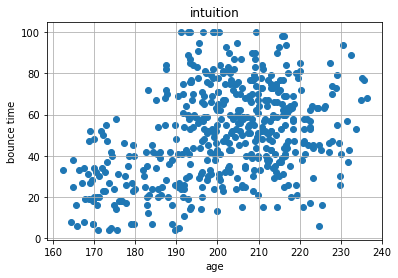

In [3]:
plt.figure()
plt.title("intuition")
plt.scatter(df['bounce_time'].values , df['age'].values )
plt.ylabel('bounce time')
plt.xlabel("age")
plt.grid()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


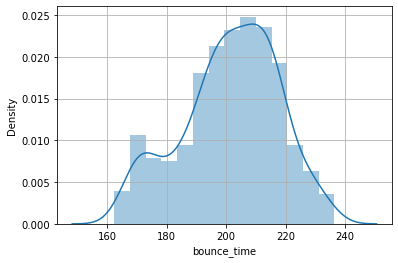

In [4]:
plt.figure()
sns.distplot(df.bounce_time)
plt.grid()
plt.show()

 在我們進行下一步前 , 如果我們的 dependent variable 是可以 標準化的（ standarised ）. 

 這樣的標轉化對於 我們的 statistical findings 是沒有問題的 , 而且還可以 speepding up our model fitting 

 here using "sklearn" preprocessing

In [5]:
from sklearn import preprocessing

df['age_scaled'] = preprocessing.scale(df.age.values)

df

,bounce_time,age,county,location,age_scaled
0,165.548520,16,devon,a,-1.512654
1,167.559314,34,devon,a,-0.722871
2,165.882952,6,devon,a,-1.951423
3,167.685525,19,devon,a,-1.381024
4,169.959681,34,devon,a,-0.722871
...,...,...,...,...,...
475,211.153312,82,essex,c,1.383217
476,213.577174,59,essex,c,0.374050
477,207.625105,69,essex,c,0.812818
478,198.252773,75,essex,c,1.076080


<Figure size 432x288 with 0 Axes>

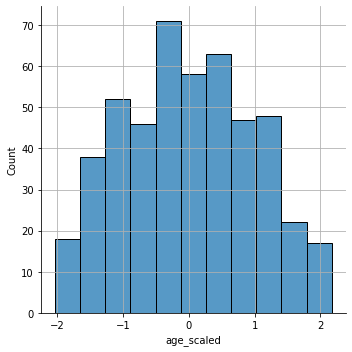

In [6]:
plt.figure()
sns.displot(df.age_scaled)
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

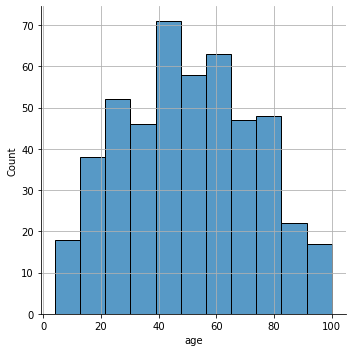

In [7]:
plt.figure()
sns.displot(df.age,kde=False)
plt.grid()
plt.show()

In [8]:
import statsmodels.api as sm 


# attribute
x = df['age_scaled'].values 
y = df['bounce_time'].values
x = sm.add_constant(x)

x[ :5 :,]

array([[ 1.        , -1.5126541 ],
       [ 1.        , -0.72287096],
       [ 1.        , -1.95142251],
       [ 1.        , -1.38102357],
       [ 1.        , -0.72287096]])

In [9]:
model = sm.OLS(y,x)
res = model.fit()
print(res.summary())
params = res.params


mse_square = np.sqrt( np.mean( (y -np.dot(x,params) )**2 ) )

result_df = pd.DataFrame(columns=['Values'])
result_df.loc["Linear regression"] = mse_square
print(result_df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     84.58
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.14e-18
Time:                        22:13:33   Log-Likelihood:                -1978.7
No. Observations:                 480   AIC:                             3961.
Df Residuals:                     478   BIC:                             3970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.3165      0.683    294.837      0.0

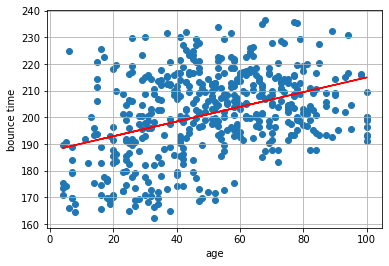

In [10]:
plt.figure()
plt.plot(df['age'],np.dot(x,params),color="red")
plt.scatter(df['age'],df['bounce_time'])
plt.grid()
plt.xlabel("age")
plt.ylabel("bounce time")
plt.show()

From the res.summary and the figure , we do find out that 

老年人花比較多的時間 在網頁上 觀看食譜


＃ Ｎext 

計量回歸假設中 我們都知道有 誤差項 i.i.d nomral(0,1) 

換言之 , homoscedastic ,我們可以用 yellowbrick（library） 來看一下誤差的分配

yellowbrick 好像跟 sklearn 綁在一起的 library



In [11]:
import yellowbrick
from sklearn.linear_model import ridge 

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression(fit_intercept=True)
x = df.age_scaled.values.reshape(-1,1)
y = df.bounce_time.values


res = model.fit(x,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


check u 一下值是否和 statsmodel 一樣

In [12]:
print("model slope : "     , model.coef_[0])
print("model intercept : " , model.intercept_)

model slope :  6.279602007970821
model intercept :  201.31646151854164


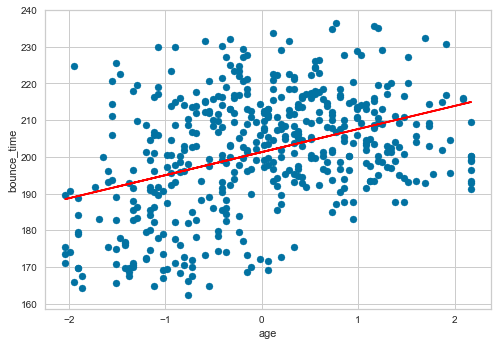

In [13]:
plt.figure()
plt.scatter(x,y)
plt.plot( x , model.predict(x) , color="red")
plt.xlabel("age")
plt.ylabel("bounce_time")
plt.show()

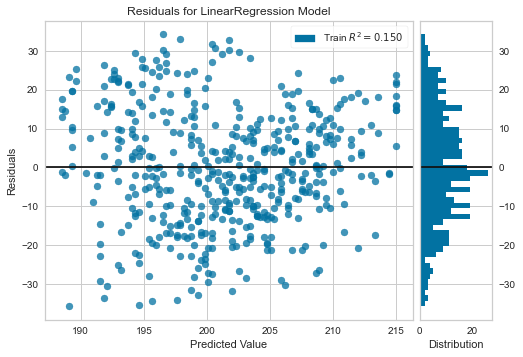

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
visualizer = ResidualsPlot(model)
visualizer.fit(x,y)
visualizer.show()

Actually not too bad for a residual 

No handles with labels found to put in legend.


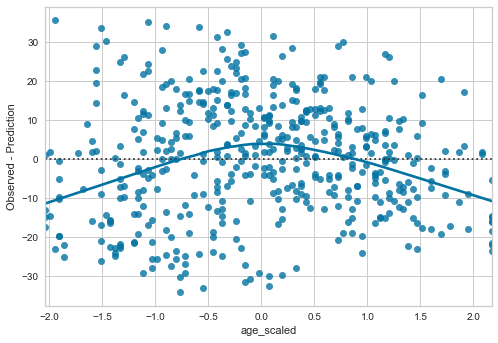

In [15]:
plt.figure()
ax = sns.residplot(x = "age_scaled", y= "bounce_time", data = df, lowess = True)
ax.set(ylabel='Observed - Prediction')
plt.legend()
plt.show()

如果我們想要考慮 其他 county 還有 location 的變數 把他從 誤差項中拿出來這

Recall 翔蛇 計量課中 , OLS 計量的模型假設

< 1. > x and y 具有模型設定之線性關係

< 2. > xi 為隨機的

< 3. > ui coindition 在 xi 的期望值唯獨地的 , 換言之 ui 對 xi 在期望值上獨立

< 4. > no serial correltaion --> corr(xi,yi) 為隨機 “獨立” 抽取之成對樣本

< 5. > homosecadasticity --> 同質變異數 （上面觀察過了）


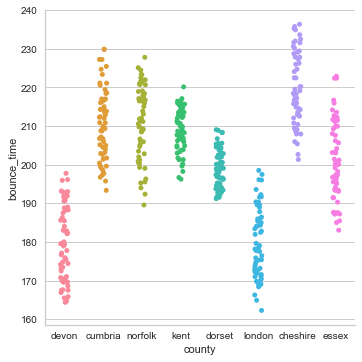

In [16]:
sns.catplot(x='county', y ='bounce_time' ,data=df)

從上面那張圖 可以明顯看出來 county and bounce time 為非常不像獨立的

這樣的話要怎麼辦了 大家可以想一下

--> 有兩種辦法 

1. 把所有的 county 資料 分開做 seperate regression analsis 

2. modelling county as a fixed effect (dummy variable)



--> 我們先來做第一種比較繁瑣的方法


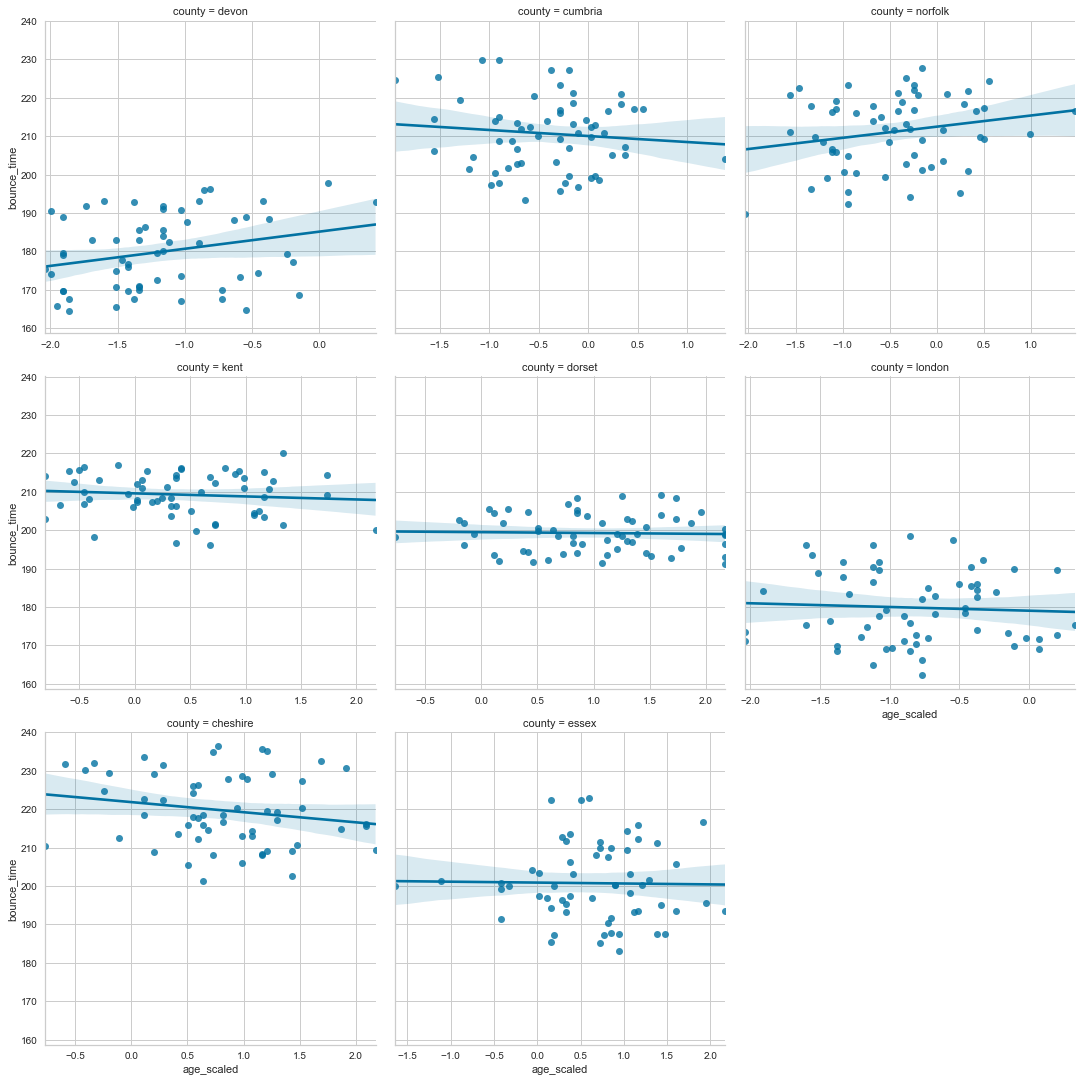

In [17]:
grid = sns.lmplot(x='age_scaled',y='bounce_time',col='county',data=df , sharex=False , col_wrap=3)

this might be a way of analysis but if we have lots of different county the analysis procedure will be too complex to progress


that's why we need fixed effect --> dummy variable

In [18]:
counties = df['county']
counties = pd.get_dummies(counties)
new_df = pd.concat([df,counties],axis=1).drop(['county'],axis=1)
new_df

,bounce_time,age,location,age_scaled,cheshire,cumbria,devon,dorset,essex,kent,london,norfolk
0,165.548520,16,a,-1.512654,0,0,1,0,0,0,0,0
1,167.559314,34,a,-0.722871,0,0,1,0,0,0,0,0
2,165.882952,6,a,-1.951423,0,0,1,0,0,0,0,0
3,167.685525,19,a,-1.381024,0,0,1,0,0,0,0,0
4,169.959681,34,a,-0.722871,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,211.153312,82,c,1.383217,0,0,0,0,1,0,0,0
476,213.577174,59,c,0.374050,0,0,0,0,1,0,0,0
477,207.625105,69,c,0.812818,0,0,0,0,1,0,0,0
478,198.252773,75,c,1.076080,0,0,0,0,1,0,0,0


In [19]:
counties = counties.drop(['cheshire'],axis=1)
counties

,cumbria,devon,dorset,essex,kent,london,norfolk
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
475,0,0,0,1,0,0,0
476,0,0,0,1,0,0,0
477,0,0,0,1,0,0,0
478,0,0,0,1,0,0,0


In [20]:
x = pd.concat([new_df['age_scaled'],counties],axis=1)
print(x)
y = new_df . bounce_time.values
x = x.values

     age_scaled  cumbria  devon  dorset  essex  kent  london  norfolk
0     -1.512654        0      1       0      0     0       0        0
1     -0.722871        0      1       0      0     0       0        0
2     -1.951423        0      1       0      0     0       0        0
3     -1.381024        0      1       0      0     0       0        0
4     -0.722871        0      1       0      0     0       0        0
..          ...      ...    ...     ...    ...   ...     ...      ...
475    1.383217        0      0       0      1     0       0        0
476    0.374050        0      0       0      1     0       0        0
477    0.812818        0      0       0      1     0       0        0
478    1.076080        0      0       0      1     0       0        0
479    0.681188        0      0       0      1     0       0        0

[480 rows x 8 columns]


In [21]:
stats_x = sm.add_constant(x)
stats_model = sm.OLS(y,stats_x)
res = stats_model.fit()
params = res.params
print( res.summary() )



mse_square = np.sqrt( np.mean( (y -np.dot(stats_x,params) )**2 ) )
result_df.loc['Fixed'] = mse_square

print(result_df)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 18 May 2021   Prob (F-statistic):          3.78e-125
Time:                        22:13:38   Log-Likelihood:                -1711.9
No. Observations:                 480   AIC:                             3442.
Df Residuals:                     471   BIC:                             3479.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.6894      1.219    180.192      0.0

 --> 可以看到 r square 已經從 0.15 大幅上升至 0.72 了 

 --> 且用 YELLOWBRICK 做出來的 residual plot 也可以發現 residual 的壯變變好了

In [22]:
model = LinearRegression(fit_intercept=True)
model.fit(x,y)


LinearRegression()

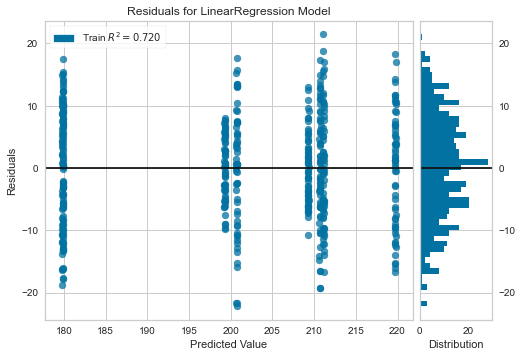

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
model = LinearRegression(fit_intercept=True)
model.fit(x,y)

visualizer = ResidualsPlot(model)
visualizer.fit(x,y)
visualizer.show()

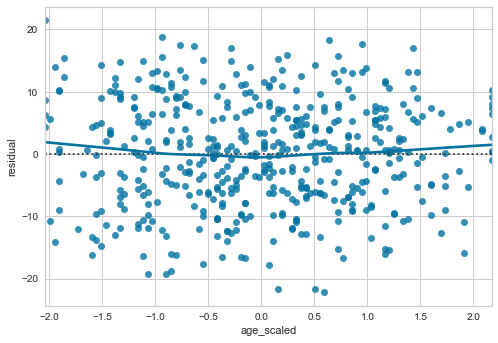

In [24]:
performance = pd.DataFrame()
performance['residual']   = model.predict(x) - df.bounce_time
performance['age_scaled'] = df.age_scaled
performance['predicted']  = model.predict(x)


plt.figure()
sns.residplot( x = 'age_scaled' , y = "residual" , data=performance , lowess=True ) 
plt.show()

Mixed effects models 


in this example we treat our age , which is what we are interested in , as a fixed effect ,

and county and location as a random effect 



在 Mixed effecfs model 裡我們假設 自變數和應變數都是獨立的  ,  --> 有點像回到古典回歸的假設嗎？


Fixed vs Random ,

Random effect ofthen are the group that we are tried to control of (想要控制的變數因子)

Fiexed effect are the variable we are interested in 



In [25]:
df

,bounce_time,age,county,location,age_scaled
0,165.548520,16,devon,a,-1.512654
1,167.559314,34,devon,a,-0.722871
2,165.882952,6,devon,a,-1.951423
3,167.685525,19,devon,a,-1.381024
4,169.959681,34,devon,a,-0.722871
...,...,...,...,...,...
475,211.153312,82,essex,c,1.383217
476,213.577174,59,essex,c,0.374050
477,207.625105,69,essex,c,0.812818
478,198.252773,75,essex,c,1.076080


In [26]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

"""
over here  
bounce_time = y 
age_scaled  = x  --> fixed effect
groups      = random effect 

"""
md = smf.mixedlm("bounce_time ~ age_scaled", df, groups=df["county"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: bounce_time
No. Observations: 480     Method:             REML       
No. Groups:       8       Scale:              74.7350    
Min. group size:  60      Log-Likelihood:     -1733.0397 
Max. group size:  60      Converged:          Yes        
Mean group size:  60.0                                   
---------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   201.316    5.175 38.902 0.000 191.174 211.459
age_scaled    0.136    0.612  0.221 0.825  -1.065   1.336
Group Var   212.999   13.382                             



in above result , we can point out that the coeffeicient of age_scaled is much higher than OLS result (ealier)

however , this result also show that the coeffeicient is not statistically different from 0 --> ( confidence level ) 

可以也看一下 residual plot

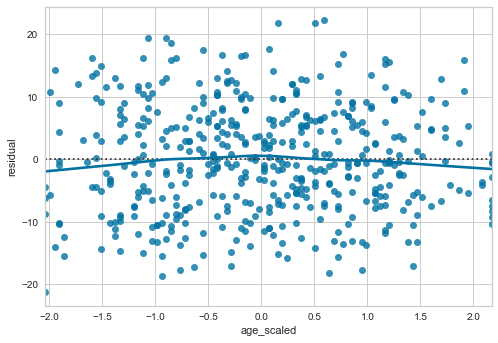

In [27]:
performance = pd.DataFrame()
performance['residual']   = mdf.resid.values
performance['age_scaled'] = df.age_scaled
performance['predicted']  = mdf.fittedvalues


plt.figure()
sns.residplot( x = 'age_scaled' , y = "residual" , data=performance ,lowess=True) 
plt.show()

可以從上圖發現其實表現和 用 dummy 的結果是差不多的

如國直接看 residual 也是一樣的

但是為什麼呢？ --> （ 真的是這樣嗎 QQ ）


dummy vairable 是對當 某一個county 為一的時候 對 intercept 做平移   , 但是 age 對於 bounce time 的 slope 也就是敏感度大家都是一樣的

但是 each county 和 age_scaled 可能有某種交成作用項

所以這邊加入交成作用項 變成 Mixed_Random_Slope  

交成作用項 explane 

以台灣薪水為例（假設而已 ＝＝）

--> 工程師       -->   dummy 0 , 1  --> D1
--> 是否為IC 設計 -->   dummy 0 , 1  --> D2

假設為 y 為 salary 那在台灣這樣的交成作用項 --> beta *(D1D2) -->  顯然會對 y 有影響 --> 那就表示他除了對 b0 (intercept) 有影響外 也要對其 slope 有影響



In [28]:
y_pred = mdf.fittedvalues

mse_square = np.sqrt( np.mean( (y - y_pred )**2 ) )
result_df.loc['Mixed'] = mse_square

print(result_df)

                      Values
Linear regression  14.928334
Fixed               8.563396
Mixed               8.563948


In [29]:
md = smf.mixedlm("bounce_time ~ age_scaled", df, groups=df["county"] , re_formula="~age_scaled")
mdf = md.fit()
mdf.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2189: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:                 MixedLM    Dependent Variable:    bounce_time
No. Observations:      480        Method:                REML       
No. Groups:            8          Scale:                 72.8722    
Min. group size:       60         Log-Likelihood:        -1733.3946 
Max. group size:       60         Converged:             Yes        
Mean group size:       60.0                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              202.140    8.356 24.190 0.000 185.762 218.518
age_scaled               0.161    1.196  0.134 0.893  -2.184   2.505
Group Var              558.143                                      
Group x age_scaled Cov -51.614                                      
age_scaled Var           8.621                                      
====================================================================

"""

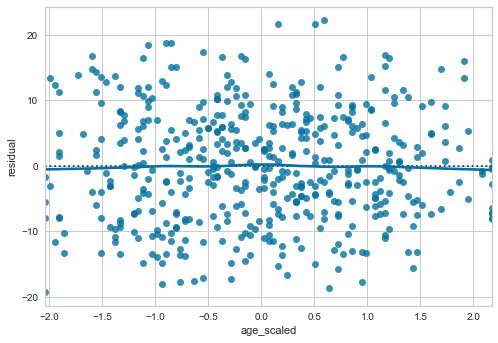

In [30]:
performance = pd.DataFrame()
performance['residual']   = mdf.resid.values
performance['age_scaled'] = df.age_scaled
performance['predicted']  = mdf.fittedvalues


plt.figure()
sns.residplot( x = 'age_scaled' , y = "residual" , data=performance ,lowess=True) 
plt.show()

In [31]:
y_pred = mdf.fittedvalues

mse_square = np.sqrt( np.mean( (y - y_pred )**2 ) )
result_df.loc['Mixed_Random_Slope'] = mse_square

print(result_df)

                       Values
Linear regression   14.928334
Fixed                8.563396
Mixed                8.563948
Mixed_Random_Slope   8.475248
